In [25]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [26]:
df = pd.read_csv('all_data.csv')

# Data Cleaning/Preprocessing 

In [27]:

# Check for missing values
print(df.isnull().sum()) 

idx                     0
Rank                    0
Major                   0
Degree                  0
Early Career Pay        0
Mid Career Pay          0
Percent High Meaning    0
dtype: int64


# Data Analysis and Visualization

In [28]:
# 1. Descriptive Statistics
df.describe()

,idx,Rank,Early Career Pay,Mid Career Pay,Percent High Meaning
count,799.000000,799.000000,799.000000,799.000000,799.000000
mean,399.000000,399.450563,59671.339174,98173.717146,49.514393
std,230.795725,230.743046,11236.588423,23574.508557,19.205706
min,0.000000,1.000000,38700.000000,44900.000000,0.000000
25%,199.500000,198.000000,51300.000000,81300.000000,42.000000
50%,399.000000,400.000000,57000.000000,94600.000000,50.000000
75%,598.500000,599.000000,66650.000000,112500.000000,61.000000
max,798.000000,799.000000,109600.000000,212500.000000,95.000000


# 2. Distribution of Pay

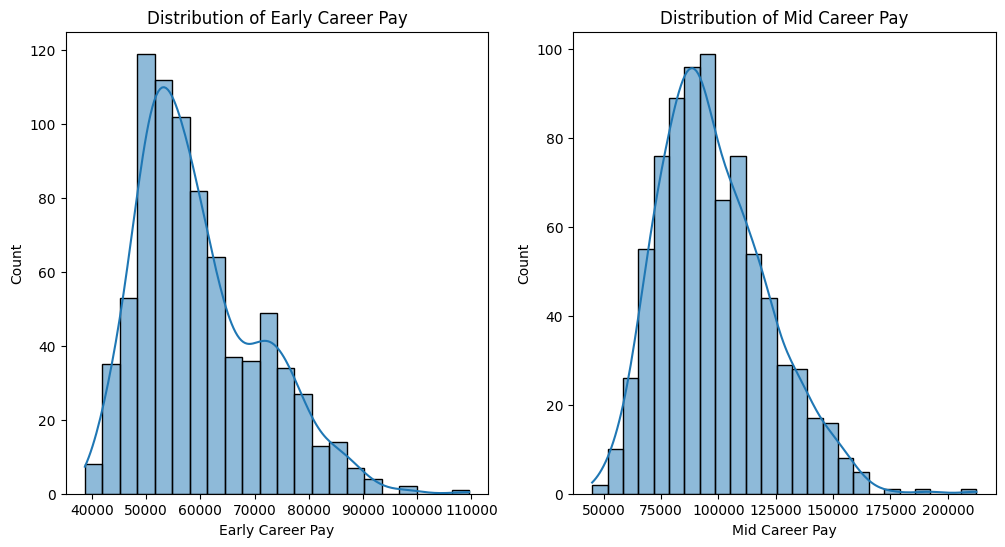

In [29]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Early Career Pay'], kde=True)
plt.title('Distribution of Early Career Pay')
plt.subplot(1, 2, 2)
sns.histplot(df['Mid Career Pay'], kde=True)
plt.title('Distribution of Mid Career Pay')
plt.show()

# 3. Relationship between Early and Mid Career Pay

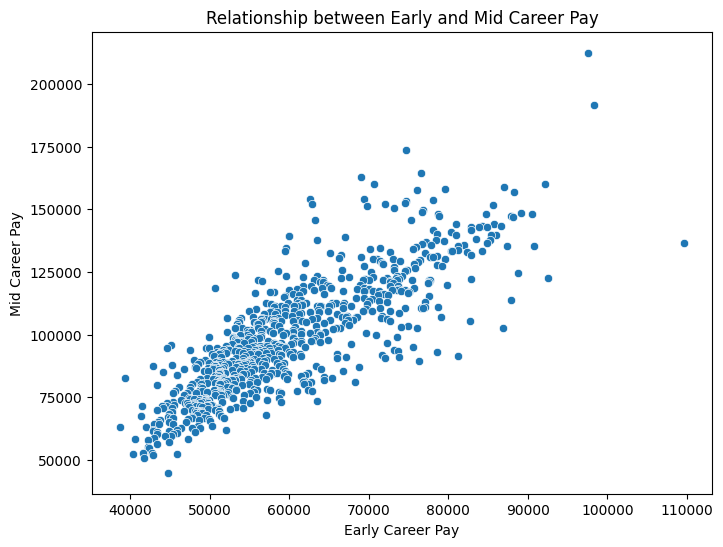

In [30]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Early Career Pay', y='Mid Career Pay', data=df)
plt.title('Relationship between Early and Mid Career Pay')
plt.show()

# 4. Pay vs. Meaning

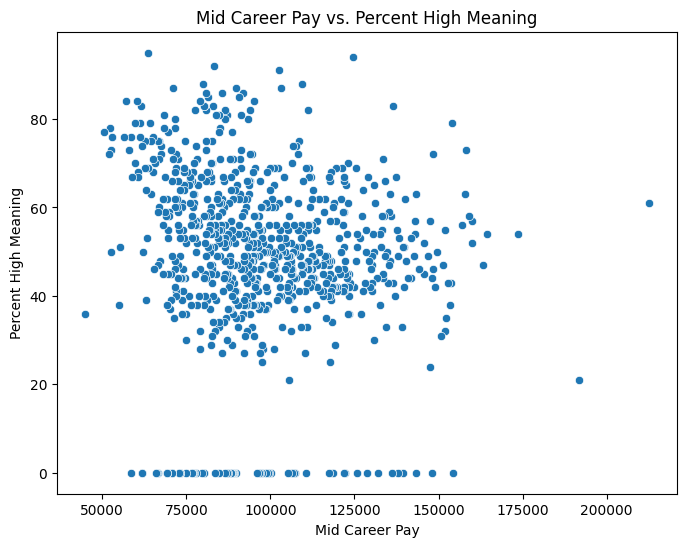

In [31]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Mid Career Pay', y='Percent High Meaning', data=df)
plt.title('Mid Career Pay vs. Percent High Meaning')
plt.show()

# 5. Top Paying Majors (Mid-Career)

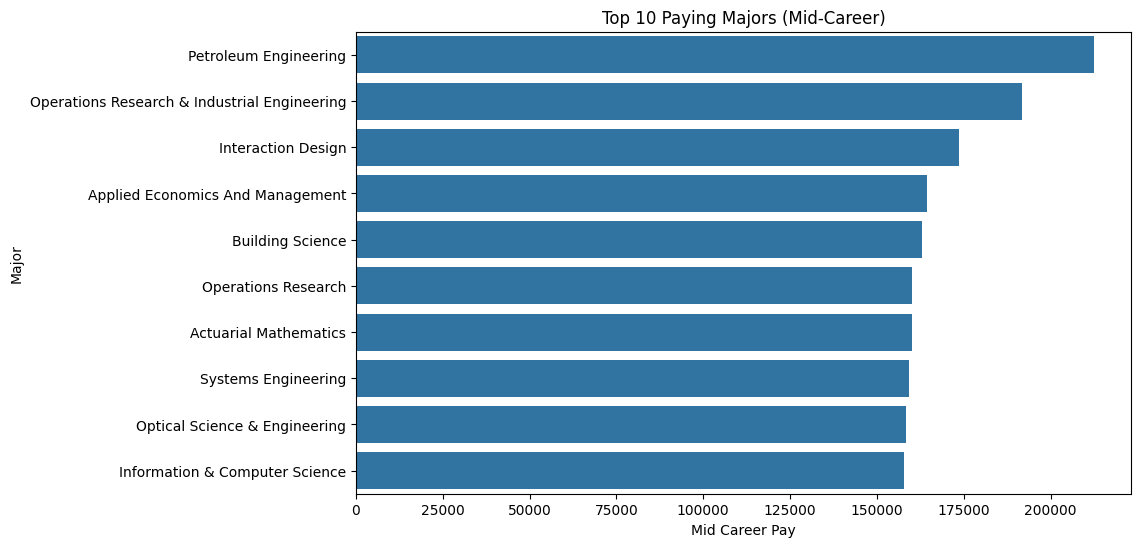

   idx  Rank                                         Major     Degree  \
0    0     1                         Petroleum Engineering  Bachelors   
1    1     2  Operations Research & Industrial Engineering  Bachelors   
2    2     3                            Interaction Design  Bachelors   
3    3     4              Applied Economics And Management  Bachelors   
4    4     5                              Building Science  Bachelors   
6    6     6                           Operations Research  Bachelors   
5    5     6                         Actuarial Mathematics  Bachelors   
7    7     8                           Systems Engineering  Bachelors   
8    8     9                 Optical Science & Engineering  Bachelors   
9    9    10                Information & Computer Science  Bachelors   

   Early Career Pay  Mid Career Pay  Percent High Meaning  
0             97500          212500                    61  
1             98300          191800                    21  
2             74

In [32]:
top_majors = df.sort_values('Mid Career Pay', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Mid Career Pay', y='Major', data=top_majors)
plt.title('Top 10 Paying Majors (Mid-Career)')
plt.show()
print(top_majors)

# 6. Majors with Highest Meaning

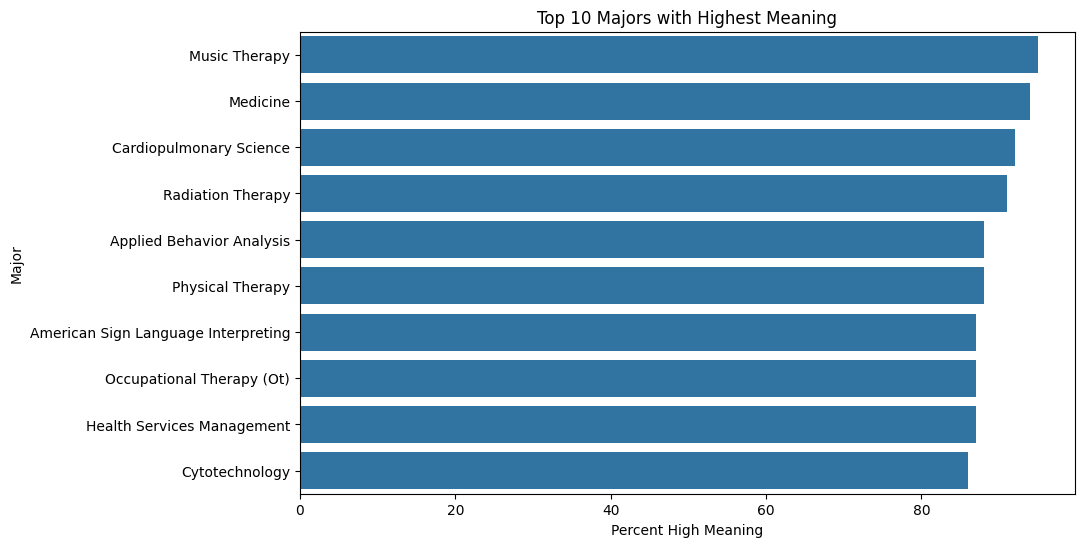

     idx  Rank                                Major     Degree  \
766  766   767                        Music Therapy  Bachelors   
107  107   108                             Medicine  Bachelors   
567  567   568              Cardiopulmonary Science  Bachelors   
305  305   304                    Radiation Therapy  Bachelors   
620  620   621            Applied Behavior Analysis  Bachelors   
234  234   232                     Physical Therapy  Bachelors   
463  463   464  American Sign Language Interpreting  Bachelors   
299  299   300            Occupational Therapy (Ot)  Bachelors   
716  716   716           Health Services Management  Bachelors   
535  535   535                       Cytotechnology  Bachelors   

     Early Career Pay  Mid Career Pay  Percent High Meaning  
766             48500           63500                    95  
107             88700          124700                    94  
567             56500           83200                    92  
305             76100    

In [33]:

meaningful_majors = df.sort_values('Percent High Meaning', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Percent High Meaning', y='Major', data=meaningful_majors)
plt.title('Top 10 Majors with Highest Meaning')
plt.show()
print(meaningful_majors)

# 7. Correlation Matrix

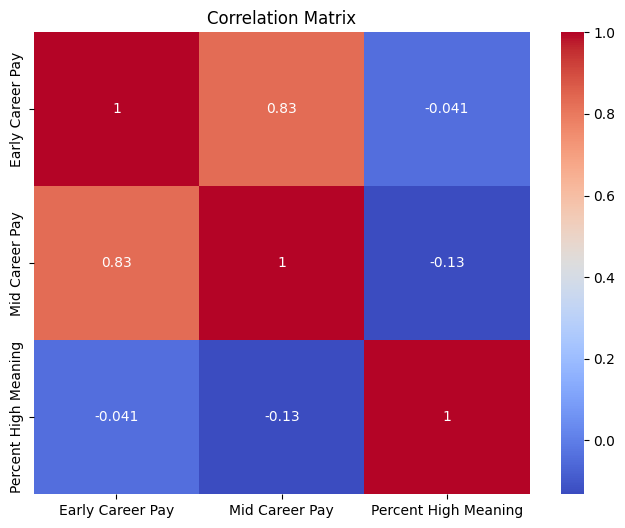

In [34]:
correlation_matrix = df[['Early Career Pay', 'Mid Career Pay', 'Percent High Meaning']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [35]:
df['Pay_Growth'] = df['Mid Career Pay'] - df['Early Career Pay']

#Distribution of Pay Growth

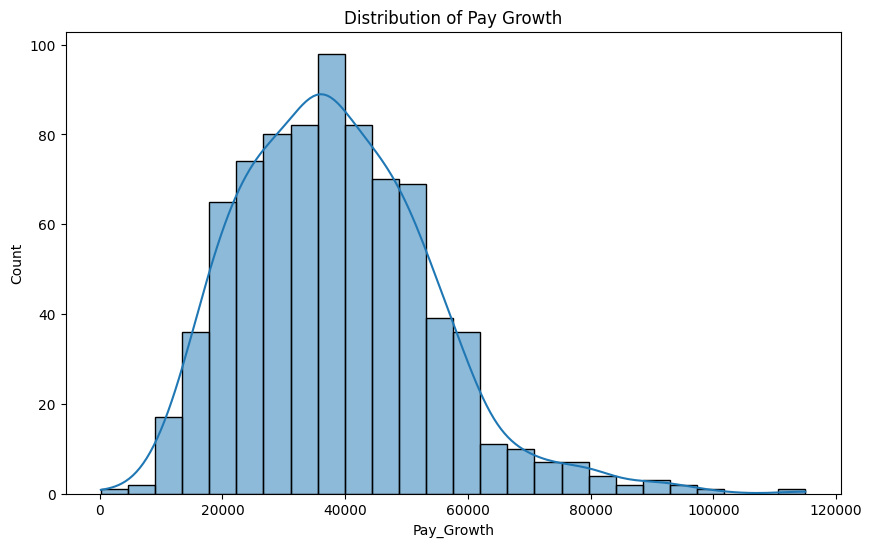

In [36]:
plt.figure(figsize=(10,6))
sns.histplot(df['Pay_Growth'], kde=True)
plt.title('Distribution of Pay Growth')
plt.show()


# Top 10 Majors with highest Pay Growth

In [37]:
top_pay_growth = df.sort_values('Pay_Growth', ascending=False).head(10)

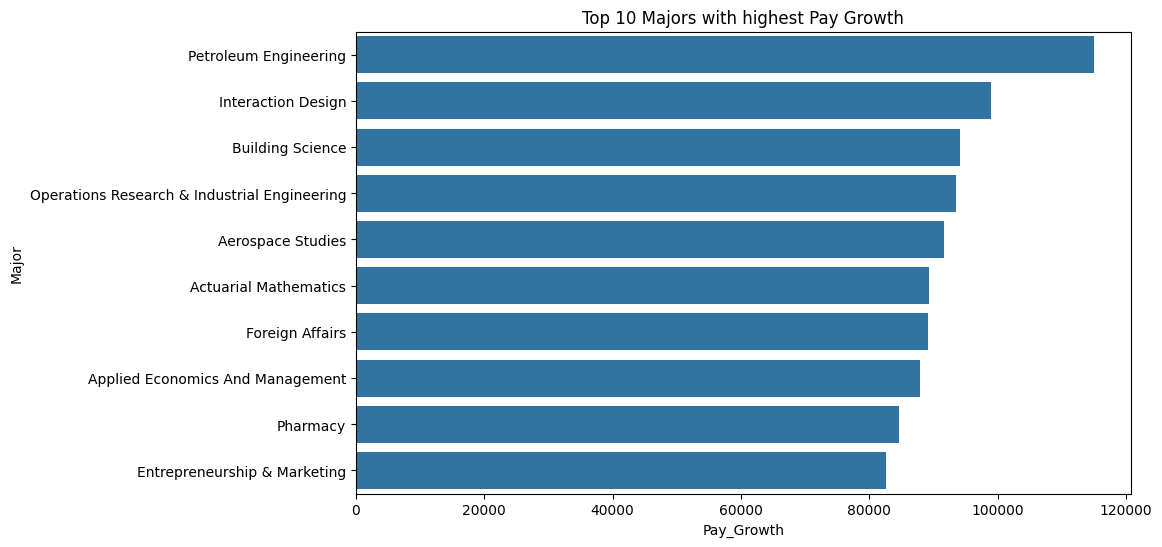

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(x='Pay_Growth', y='Major', data=top_pay_growth)
plt.title('Top 10 Majors with highest Pay Growth')
plt.show()


In [39]:
df.sort_values('Pay_Growth', ascending=False).head(10)

,idx,Rank,Major,Degree,Early Career Pay,Mid Career Pay,Percent High Meaning,Pay_Growth
0,0,1,Petroleum Engineering,Bachelors,97500,212500,61,115000
2,2,3,Interaction Design,Bachelors,74700,173600,54,98900
4,4,5,Building Science,Bachelors,69000,163100,47,94100
1,1,2,Operations Research & Industrial Engineering,Bachelors,98300,191800,21,93500
11,11,12,Aerospace Studies,Bachelors,62600,154300,0,91700
5,5,6,Actuarial Mathematics,Bachelors,70700,160000,52,89300
17,17,18,Foreign Affairs,Bachelors,62900,152000,32,89100
3,3,4,Applied Economics And Management,Bachelors,76500,164400,54,87900
12,12,13,Pharmacy,Bachelors,69400,154000,79,84600
30,30,31,Entrepreneurship & Marketing,Bachelors,63200,145800,45,82600
